In [24]:
##(6)implementing a 5 qubit quantum fourier transformer

In [25]:
!pip install qiskit qiskit-aer

In [26]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def qft(qc, n):
    """Applies the Quantum Fourier Transform on n qubits in circuit qc."""
    for j in range(n):
        qc.h(j)  # Apply Hadamard gate
        for k in range(j + 1, n):
            qc.cp(np.pi / 2 ** (k - j), k, j)  # Controlled phase rotation

    # Finally, swap qubits (to reverse order)
    for i in range(n // 2):
        qc.swap(i, n - i - 1)

In [28]:
n_qubits = 5
qc = QuantumCircuit(n_qubits, n_qubits)

In [29]:
qc.x(0)
qc.x(2)

In [30]:
qft(qc, n_qubits)

In [31]:
qc.measure(range(n_qubits), range(n_qubits))

In [32]:
print(qc.draw())

     ┌───┐┌───┐                                                            »
q_0: ┤ X ├┤ H ├─■────────■─────────────■─────────────────■─────────────────»
     └───┘└───┘ │P(π/2)  │       ┌───┐ │                 │                 »
q_1: ───────────■────────┼───────┤ H ├─┼────────■────────┼─────────■───────»
     ┌───┐               │P(π/4) └───┘ │        │P(π/2)  │         │       »
q_2: ┤ X ├───────────────■─────────────┼────────■────────┼─────────┼───────»
     └───┘                             │P(π/8)           │         │P(π/4) »
q_3: ──────────────────────────────────■─────────────────┼─────────■───────»
                                                         │P(π/16)          »
q_4: ────────────────────────────────────────────────────■─────────────────»
                                                                           »
c: 5/══════════════════════════════════════════════════════════════════════»
                                                                           »

In [33]:
sim = AerSimulator()
tqc = transpile(qc, sim)
result = sim.run(tqc, shots=1024).result()
counts = result.get_counts()

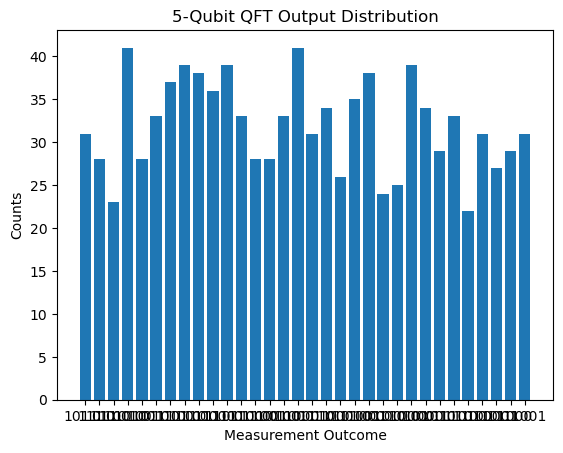

In [34]:
plt.bar(counts.keys(), counts.values())
plt.title("5-Qubit QFT Output Distribution")
plt.xlabel("Measurement Outcome")
plt.ylabel("Counts")
plt.show()

In [35]:
# Yes, I understand the provided code. It implements the **Quantum Fourier Transform (QFT)** 
# algorithm using Qiskit and simulates it for a 5-qubit system.

# Here is a detailed explanation of the code, focusing on the core concepts, the QFT function, and how the results are obtained, 
# structured to help you prepare for your practical exam.

# -----

# ## 🔬 Quantum Fourier Transform (QFT) Code Explanation

# The code defines and executes a **5-qubit Quantum Fourier Transform (QFT)** on a specific input state.

# ### 1\. 🛠️ Setup and Initialization (Cells 2, 3, 5)

#   * **Libraries:** The code imports necessary components from `qiskit` and `qiskit_aer`.
#       * `QuantumCircuit`: To build the quantum circuit.
#       * `AerSimulator`: To run the simulation.
#       * `numpy`: For mathematical constants (like $\pi$) used in gates.
#       * `matplotlib.pyplot`: For plotting the results.
#   * **Circuit Initialization (Cell 5):**
#     ```python
#     n_qubits = 5
#     qc = QuantumCircuit(n_qubits, n_qubits)
#     ```
#     A quantum circuit `qc` is created with **5 quantum bits (`n_qubits`)** and **5 classical bits** (for measurement).
#   * **Input State Preparation (Cell 6):**
#     ```python
#     qc.x(0)
#     qc.x(2)
#     ```
#     This applies the **Pauli-X gate** (a NOT gate) to qubits 0 and 2.
#       * Qubit indexing in Qiskit is typically **reversed** (qubit 0 is the least significant bit, LSB).
#       * The state $|\psi\rangle$ is initialized to $|00000\rangle$.
#       * Applying $X$ to qubits 0 and 2 changes the state to 
#           $|00101\rangle$. In decimal, $1 \cdot 2^0 + 0 \cdot 2^1 + 1 \cdot 2^2 + 0 \cdot 2^3 + 0 \cdot 2^4 = 1 + 4 = 5$.
#       * The initial state is **$|5\rangle$**. The QFT is performed on this input state.

# -----

# ### 2\. 🌀 The Quantum Fourier Transform Function (Cell 4)

# The function `qft(qc, n)` builds the QFT circuit for `n` qubits.

# ```python
# def qft(qc, n):
#     for j in range(n):
#         qc.h(j)  # 1. Hadamard gate
#         for k in range(j + 1, n):
#             qc.cp(np.pi / 2 ** (k - j), k, j)  # 2. Controlled Phase Rotation
#     # 3. Swap gates
#     for i in range(n // 2):
#         qc.swap(i, n - i - 1)
# ```

# #### Steps of the QFT Implementation:

# 1.  **Hadamard Gate:** For each qubit $j$ (from 0 to $n-1$), a **Hadamard gate ($\mathbf{H}$)** is applied. 
# This creates an initial superposition on that qubit.
# 2.  **Controlled Phase Rotations:** For each qubit $j$, a series of **Controlled Phase rotations ($\mathbf{C P}(\theta)$)** 
# are applied between qubit $j$ and all subsequent qubits $k$ (where $k > j$).
#       * The angle for the rotation is $\theta = \frac{2\pi}{2^{k-j}}$. In the code, this is calculated as $\pi / 2^{k-j}$. 
# (Note: Qiskit's `qc.cp` uses $\lambda$ which is equal to $\theta$ in the QFT formula $\phi = 2\pi k / 2^n$. The code uses $\pi/2^m$ where $m=k-j$, 
# corresponding to an angle of $2\pi/2^{m+1}$).
#       * These controlled rotations encode the phase information from the input state into the resulting superposition.
# 3.  **Qubit Swaps:** The QFT algorithm inherently outputs the transformed state in **reverse order** 
# (qubit $n-1$ holds the LSB, qubit 0 holds the MSB). To correct this, **SWAP gates** are applied to reverse the order back to standard convention.

# -----

# ### 3\. 🏃 Execution and Results (Cells 7-11)

#   * **Apply QFT (Cell 7):**
#     ```python
#     qft(qc, n_qubits)
#     ```
#     The `qft` function is called to build the QFT circuit onto the 5-qubit circuit `qc`.
#   * **Measurement (Cell 8):**
#     ```python
#     qc.measure(range(n_qubits), range(n_qubits))
#     ```
#     All 5 quantum bits are measured and the results are stored in the 5 classical bits.
#   * **Circuit Drawing (Cell 9):**
#     The output shows the full circuit diagram, including the initial X-gates, the H and CP gates (for QFT), the final SWAP gates, and the measurements.
#   * **Simulation (Cell 10):**
#     ```python
#     sim = AerSimulator()
#     tqc = transpile(qc, sim)
#     result = sim.run(tqc, shots=1024).result()
#     counts = result.get_counts()
#     ```
#     The circuit is run 1024 times (`shots=1024`) on the `AerSimulator` (a local simulator), 
# and the distribution of measurement outcomes (`counts`) is collected.
#   * **Plotting (Cell 11):**
#     The resulting `counts` are plotted as a bar chart, showing the **probability distribution** of the output states.

# -----

# ## ❓ Preparing for Exam Questions

# Here are the key questions your teacher might ask, along with the answers based on this code:

# ### 1\. What is the Quantum Fourier Transform (QFT)?

#   * **Answer:** The QFT is a **quantum analogue of the Discrete Fourier Transform (DFT)**. It is an **exponentially faster** 
# quantum circuit that transforms a quantum state $|\psi\rangle$ from its computational basis representation to its frequency basis representation.
#   * **Significance:** It is a fundamental subroutine in many important quantum algorithms, most notably **Shor's algorithm** 
#   (for factoring large numbers) and the **Quantum Phase Estimation (QPE) algorithm**.

# ### 2\. What was the input state to the QFT circuit in this code?

#   * **Answer:** The input state was **$|5\rangle$** (or $|00101\rangle$ in 5-qubit binary).
#   * **How to show this:** The code applies $\mathbf{X}$ gates to **qubits 0 and 2** (Cell 6). 
#       Since $|0\rangle$ becomes $|1\rangle$, the state is $|q_4q_3q_2q_1q_0\rangle = |00101\rangle$.

# ### 3\. Explain the main gates used to construct the QFT.

#   * **Hadamard ($\mathbf{H}$):** Applied to the qubit currently being processed. It creates an even superposition, spreading the information 
# across the basis states.
#   * **Controlled Phase Rotation ($\mathbf{C P}(\theta)$):** This is the core gate that encodes the "frequency" or phase information. 
# It applies a phase shift of $e^{i\theta}$ to the target qubit **only if** the control qubit is $|1\rangle$. 
# The rotation angles $\theta$ must be calculated precisely: $\theta = \pi / 2^{m}$, where $m$ is the distance between the control and target qubits.
#   * **SWAP:** Used at the end to reverse the order of the qubits to match the standard computational basis output convention.

# ### 4\. What do you expect the output distribution to be for the input state $|5\rangle$?

#   * **Concept:** The QFT on a basis state $|x\rangle$ (where $x=5$) transforms it to a uniform superposition where the phase 
# of each basis state $|k\rangle$ is related to the input $x$ and the total number of states $N=2^n$.
#     $$
#     $$$$QFT|x\\rangle = \\frac{1}{\\sqrt{N}} \\sum\_{k=0}^{N-1} e^{2\\pi i x k / N} |k\\rangle
#     $$
#     $$$$
#     $$
#   * **Result for $|5\rangle$ (where $N=2^5=32$):** All output states will have the **same magnitude** (amplitude $1/\sqrt{32}$), 
# meaning they have an **equal probability** of being measured ($1/32$).
#   * **Expected Plot:** The bar chart (Cell 11) should show an **approximately flat** distribution, where all 32 
# possible measurement outcomes (from $|00000\rangle$ to $|11111\rangle$, or 0 to 31 in decimal) have a nearly equal number of counts (around $1024 / 32 = 32$ counts each).

# ### 5\. Why are the SWAP gates necessary?

#   * **Answer:** They are necessary because the standard QFT circuit construction processes qubits in an order 
# that naturally results in the output state being **bit-reversed** (the MSB of the output is on the LSB qubit, and vice versa). 
# The SWAP gates correct this by exchanging the first and last qubits, the second and second-to-last, and so on, restoring the standard order.

# ### 6\. What would happen if you used more qubits, say $n=10$?

#   * **Answer:**
#       * The circuit would become **much larger** (linearly more Hadamard gates, but quadratically more Controlled Phase gates, $O(n^2)$).
#       * The number of possible output states would be **$2^{10} = 1024$**.
#       * The resolution of the transform would **increase**. If the input was still a single basis state, the output distribution 
# would remain flat, but with 1024 distinct bars, each with a probability of $1/1024$.

